**sklearn08_2_特征选择在心脏病预测模型中的应用**

**特征选择与feature_selection模块：**
> 定义：从全部特征中选取一个特征子集来建立模型  <br>
目的：降低特征维度，提高模型性能  <br>
基本原则： <br>
>> ▶ 包含信息较少（方差较低）的特征应该被剔除
 ▶ 与目标特征相关性高的特征应该优先被选择

> 特征选择方法
>>|方式	|说明|主要方法
|---:|---:|---:|
|过滤式（Filter）	|特征选择的过程中不涉及建模,先特征选择，再建立模型	|方差选择法;卡方检验法;相关系数法|
|包裹式（Wrapper）	|建立模型并给定评价标准，选择效果最优的特征子集	|递归特征消除法|
|嵌入式（Embedding）	|特征选择与模型训练结合，在训练过程中自动进行特征选择|	L1正则化项;特征重要性|


> `Feature_selection`模块
>>|类	|说明|
|---:|---:|
|feature_selection.VarianceThreshold	|剔除低于方差阈值的特征|
|feature_selection.SelectKBest	      |根据给定的得分函数选出K个得分最高的特征|
|feature_selection.SelectPercentile	   |根据给定的得分函数选出前p%个得分最高的特征（p需指定）|
|---------------------------------------|---------------------------------------------|
|feature_selection.RFE	            |递归特征消除法|
|feature_selection.RFECV	         |包含交叉验证的递归特征消除法|
|---------------------------------------|---------------------------------------------|
|feature_selection.SelectFromModel	    |嵌入式特征消除法|

> 通用方法及说明：
>>|通用方法    |说明|
|---:|---:|
|fit(X, y)	          |学习怎样进行特征选择|
|transform(X)	       |对X进行特征选择|
|fit_transform(X, y)	 |先学习怎样进行特征选择，再对X进行特征选择|
|get_support()	      |返回布尔数组，指明哪些特征被选择|



**案例描述：**
> 本案例为《机器学习实践》课程第八章课件配套代码，数据集来自UCI，共303条数据，14个字段，包含患者是否患有心脏病的相关信息。本案例将使用不同的特征选择方法，选取不同的特征子集建立心脏病预测模型。

**数据集：**
> 数据来源： http://archive.ics.uci.edu/ml/datasets/Heart+Disease   <br>
> 本地地址： file_path = "./dataSets/data_chap8/heart.csv"  <br>
> 心脏病数据集heart.csv，共303个样本。该数据集包含个人信息、身体指标数据以及是否患有心脏病的标签，预测目标为是否患病target
>> |特征	|说明	|  ▏|特征	|说明|
|---:|---:|---:|---:|---:|
|age	   |年龄|                    ▏    |thalach	|最大心率|
|sex	   |性别(1=男性; 0=女性)|	        ▏    |exang	|运动诱发心绞痛（1 =是; 0 =否）|
|cp	      |胸痛类型|	               ▏	|oldpeak	|运动引起ST段压低（相对于休息）|
|trestbps	|静息血压（mm Hg）|	         ▏   |slope	|高峰运动ST段的斜率|
|chol	   |血清胆固醇（mg / dl）|	       ▏   |ca	|蓬松染色的血管（0-3）数量|
|fbs	   |(空腹血糖>120mg/dl)(1=真;0=假)| ▏	   |thal	|心肌核素显像|
|restecg	|静息心电图结果|             ▏	  |target|		|研究目标(是否患心脏病)(1=患病;0=未患病)|



**导入必要包**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

# 数据预处理

In [2]:
## 载入数据
file_path = "./dataSets/data_chap8/heart.csv"

heart = pd.read_csv(file_path)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## 查看数据集info()
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


分析： 无缺失，所有特征均为数值型

In [4]:
## 分离数据=》 X,y
y = heart['target'].copy()
X = heart.________________.copy()

In [5]:
## 划分数据=》train，test,0.2
from ________________ import train_test_split
X_train,X_test,y_train,y_test = train_test_split(___,___,test_size=0.2,random_state=10)

In [6]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

# 特征选择

## 过滤式(Filter)

### 过滤式(Filter)——剔除低方差的特征
> 思想：方差小的特征波动性小，包含的信息也较少，对模型影响较小 <br>
> 特点：与目标y无关，仅考虑一个特征自身的波动情况 <br>
> 方法：
>> 给定一个方差阈值，计算所有特征的方差  <br>
保留方差大于阈值的特征,剔除方差小于阈值的特征    <br>

> `VarianceThreshold`类:
>>|参数	   |说明|
|---:|---:|
|threshold	|输入方差阈值（浮点型），默认为0.0，会自动删除方差为0的特征

>>|属性	|说明|
|---:|---:|
|variances_ 	|查看各特征的方差|

官参：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [7]:
# 剔除低方差特征,阈值threshold=0.5
from ________________ import VarianceThreshold
sel_var = VarianceThreshold(____________)

sel_var.fit(X)
sel_var_X = sel_var.____________

In [8]:
sel_var_X.shape,  X.shape

((303, 7), (303, 13))

解析： 可看出原13个特征经过低方差过滤后变成了7个，过滤掉了6个

In [9]:
## 查看各特征的方差
sel_var.variances_

array([8.22123321e+01, 2.16449368e-01, 1.06161705e+00, 3.06571317e+02,
       2.67756065e+03, 1.26458190e-01, 2.75615680e-01, 5.22914899e+02,
       2.19978433e-01, 1.34364605e+00, 3.78481412e-01, 1.04227254e+00,
       3.73645285e-01])

In [10]:
# 查看特征选择情况
sel_var.____________

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False])

In [ ]:
# 构造一个Series，查看特征选择情况
print(pd.Series(sel_var.get_support(), index=X.columns))

In [12]:
## 只要选出的特征
features = pd.Series(____________, ____________)
sel_fea = features[features==True]
sel_fea.index

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')

★知识点：`plt.matshow()`绘制矩阵，<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow  <br>
https://www.cnblogs.com/shanger/p/13021491.html

([<matplotlib.axis.XTick at 0x20c2576fa20>,
 [Text(0, 1, 'age'),
  Text(1, 1, 'sex'),
  Text(2, 1, 'cp'),
  Text(3, 1, 'trestbps'),
  Text(4, 1, 'chol'),
  Text(5, 1, 'fbs'),
  Text(6, 1, 'restecg'),
  Text(7, 1, 'thalach'),
  Text(8, 1, 'exang'),
  Text(9, 1, 'oldpeak'),
  Text(10, 1, 'slope'),
  Text(11, 1, 'ca'),
  Text(12, 1, 'thal')])

<Figure size 576x432 with 0 Axes>

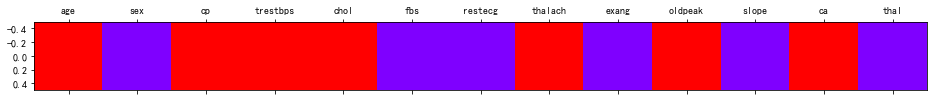

In [13]:
## 特征选择可视化（方差选择）
import matplotlib.pyplot as plt
%matplotlib inline
# 将遮罩可视化——红色为True，紫色为False
plt.figure(figsize=(16, 4))
plt.matshow(sel_var.get_support().reshape(1, -1), cmap='rainbow')
plt.xticks(range(13), X.columns)

分析：红色为选择的特征，紫色为抛弃的特征，可看出，age，cp，trestbps，chol，thalach，oldpeak，ca留下了。

### 过滤式(Filter)——卡方特征选择
> 思想：
>> ![](./imgs/chap08/fig08_05.png)
![](./imgs/chap08/fig08_06.png)

> 特点：与目标y有关，常使用皮尔逊相关系数度量特征𝑋与𝑌的线性相关性，取值在-1到1之间
>> ![](./imgs/chap08/fig08_07.png)

> `SelectKBest`和`SelectPercentile`类
>> |参数	|说明|
|:-|:-:|
| score_func      	 | 给出统计指标的函数，常用函数如下：<br>“f_regression”（默认）：相关系数检验，用于回归问题<br>“chi2”：卡方检验，用于分类问题<br>“mutual_info_regression”：计算互信息，用于回归问题<br>“f_classif”：基于方差分析的F检验，用于分类问题|
|k（SelectKBest）	|指定保留得分最高特征的个数，默认为10|
|percentile（SelectPercentile）	|指定保留得分最高的前百分之几的特征，默认为10（10%）|

>> |属性	  |说明|
|:--|:--|
|scores_ 	|返回各特征的得分|
|pvalues_ 	|返回各特征得分的p值，若score_func仅返回得分，则为无|


In [14]:
## 导入SelectKBest和chi2
from ____________ import SelectKBest
from ____________ import chi2

# 与目标变量最相关的7个特征
sel_chi = SelectKBest(score_func=chi2,k=7).fit(X,y)


In [15]:
## 各个特征变量与目标变量卡方统计量的值
print(sel_chi.scores_)

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]


In [16]:
## 查看各特征的选择情况
print(pd.Series(sel_chi.____________, index=X.columns))

age          True
sex         False
cp           True
trestbps    False
chol         True
fbs         False
restecg     False
thalach      True
exang        True
oldpeak      True
slope       False
ca           True
thal        False
dtype: bool


In [17]:
## 只要选出的特征
features = pd.Series(____________, ____________)
sel_fea = features[features==True]
sel_fea.index

Index(['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

([<matplotlib.axis.XTick at 0x20c2588e2b0>,
 [Text(0, 1, 'age'),
  Text(1, 1, 'sex'),
  Text(2, 1, 'cp'),
  Text(3, 1, 'trestbps'),
  Text(4, 1, 'chol'),
  Text(5, 1, 'fbs'),
  Text(6, 1, 'restecg'),
  Text(7, 1, 'thalach'),
  Text(8, 1, 'exang'),
  Text(9, 1, 'oldpeak'),
  Text(10, 1, 'slope'),
  Text(11, 1, 'ca'),
  Text(12, 1, 'thal')])

<Figure size 576x432 with 0 Axes>

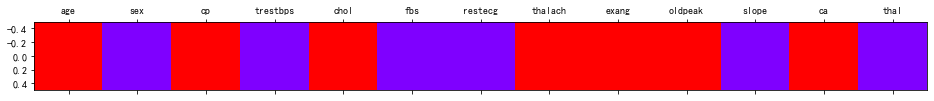

In [18]:
# 特征选择可视化（卡方检验）
import matplotlib.pyplot as plt
%matplotlib inline
# 将布尔数组可视化——红色为True，紫色为False

plt.figure(figsize=(16, 4))
plt.matshow(sel_chi.get_support().reshape(1, -1), cmap='rainbow')
plt.xticks(range(13), X.columns)

分析：过滤式(Filter)——卡方特征选择，选择的特征为age，cp，chol，thalach，exang，oldpeak，ca；这与方差过滤的结果还是有区别的。

**特征选择对比可视化**
> 将方差过滤与卡方特征选择法所得的结果进行可视化比对

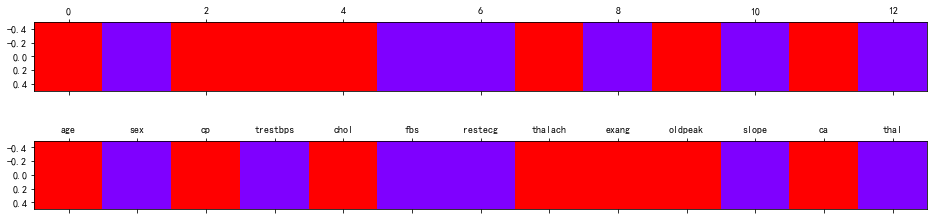

In [19]:
# 特征选择可视化（卡方检验）
import matplotlib.pyplot as plt
%matplotlib inline
# 将布尔数组可视化——红色为True，紫色为False


fig,ax = plt.subplots(2,1,figsize=(16,4))
ax[0].matshow(sel_var.get_support().reshape(1, -1), cmap='rainbow')
ax[1].matshow(sel_chi.get_support().reshape(1, -1), cmap='rainbow')

plt.xticks(range(13), X.columns)
plt.show()

分析：第一个图是方差过滤法的结果，第二个图是卡方特征选择法的结果。

## 包裹式(Wrapper) -递归特征消除法（RFE）
> RFE:Recursive Feature Elimination回归特征消除   <br>
> 思想：利用可以学习到特征权重或重要性的模型，通过递归的方式减少特征个数来进行特征选择

> 步骤:
>> 基于所有特征训练模型，得到每个特征的权重或重要性    <br>
剔除权重或重要性最小的特征，基于新的特征集合训练模型   <br>
重复上述步骤，进行递归消除，直到剩下的特征个数满足条件为止<br>

>注意：
>> 执行`RFE`的过程中，可以通过交叉验证的方式`RFECV`来评价模型在某个特征集合上的表现，以此来选择最佳的特征集合

> `RFE`类
>>| 参数	|说明|
|:---|:---|
|estimator 	|监督学习器，必须包含coef_或feature_importances_属性|
|n_features_to_select 	       |指定选出几个特征，默认为None（所有特征的一半）|
|step	|每次迭代剔除的特征数，默认为1，大于1为剔除的个数，0~1之间为剔除的比例|

>> |属性	|说明|
|:---|:---|
|support_	|指明哪些特征被选择（布尔数组）|
|ranking_ 	|特征的排名（表示被剔除的顺序）|

>官方文档：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

### RFE特征选择

In [20]:
## 采用递归特征消除法,estimator使用DecsionTreeClassifier

from ____________ import RFE
from ____________ import DecisionTreeClassifier

## 实例化RFE：estimator=DecisionTreeClassifier(),选择保留7个特征

rfe = RFE(estimator=DecisionTreeClassifier(random_state=10),____________)

rfe.fit(X_train,y_train)

##  对X_train进行转换,即特征选择
X_train_rfe = rfe.____________

##  对X_test进行转换，即特征选择
X_test_rfe = rfe.____________


In [26]:
## 未进行选择的模型评分
Acc = DecisionTreeClassifier(random_state=10).fit(X_train,y_train).____________
print("未进行选择的模型评分Acc:",Acc)

未进行选择的模型评分Acc: 0.7377049180327869


In [27]:
## 经过特征选择后的模型评分
Acc1 = DecisionTreeClassifier(random_state=10).fit(X_train_rfe,y_train).____________
print("经过特征选择后的模型评分Acc1:",Acc1)

经过特征选择后的模型评分Acc1: 0.7868852459016393


分析： 从模型Acc的结果看，经过特征选择后，模型性能有所提升。  除了以上方式计算模型score之外，还可以直接使用rfe模型预测，一步到位

In [28]:
from ____________ import accuracy_score
## 其功能为：先对X_test进行转换后，再用设定好的学习器进行预测
y_pred = rfe.predict(X_test)

## 可利用y_pred,与 y_test求正确率
Acc2 = accuracy_score(y_test,y_pred)
print("经过特征选择后的模型评分Acc2:",Acc2)

##  或者也可以使用score()
## 注意：此时的X_test是进行特征选择后的X_test，再用设定好的学习器评分
Acc3 = rfe.score(X_test, y_test)
print("经过特征选择后的模型评分Acc3:",Acc3)

经过特征选择后的模型评分Acc2: 0.7868852459016393
经过特征选择后的模型评分Acc3: 0.7868852459016393


分析：Acc1，Acc2，Acc3完全相同，不同的方式实现同样的结果。

In [38]:
## 特征排名
pd.Series(rfe.ranking_, index=X.columns).sort_values(ascending=False)

fbs         7
restecg     6
thal        5
sex         4
exang       3
slope       2
age         1
cp          1
trestbps    1
chol        1
thalach     1
oldpeak     1
ca          1
dtype: int32

解析：
>|特征	|排名|
|:--|:--|
|age	|1（被选择）|
|sex         	|4（第4次被剔除）|
|cp          	|1（被选择）|
|trestbps    	|1（被选择）|
|chol        	|1（被选择）|
|fbs         	|7（第1次被剔除）|
|restecg     	|6（第2次被剔除）|
|halach     	|1（被选择）|
|exang       	|3（第5次被剔除）|
|oldpeak     	|1（被选择）|
|slope      	|2（第6次被剔除）|
|ca          	|1（被选择）|
|thal 	|5（第3次被剔除）|


In [29]:
## 查看特征选择情况
rfe.support_

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False])

In [30]:
## 构造Series查看特征选择情况
pd.Series(rfe.support_, index=X.columns)

age          True
sex         False
cp           True
trestbps     True
chol         True
fbs         False
restecg     False
thalach      True
exang       False
oldpeak      True
slope       False
ca           True
thal        False
dtype: bool

([<matplotlib.axis.XTick at 0x20c26aba0b8>,
 [Text(0, 1, 'age'),
  Text(1, 1, 'sex'),
  Text(2, 1, 'cp'),
  Text(3, 1, 'trestbps'),
  Text(4, 1, 'chol'),
  Text(5, 1, 'fbs'),
  Text(6, 1, 'restecg'),
  Text(7, 1, 'thalach'),
  Text(8, 1, 'exang'),
  Text(9, 1, 'oldpeak'),
  Text(10, 1, 'slope'),
  Text(11, 1, 'ca'),
  Text(12, 1, 'thal')])

<Figure size 1152x288 with 0 Axes>

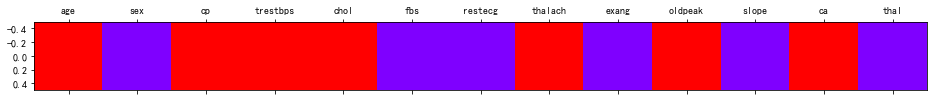

In [39]:
# 特征选择可视化（RFE）
plt.figure(figsize=(16, 4))
plt.matshow(rfe.get_support().reshape(1, -1), cmap='rainbow')
plt.xticks(range(13), X.columns)

### RFECV特征选择

>`RFECV`类
>> |参数	               |说明|
|:--|:--|
|estimator 	|监督学习器，必须包含coef_或feature_importances_属性|
|min_features_to_select 	    | 需要选择的最小特征数，默认为1|
|step	|每次迭代剔除的特征数，默认为1，大于1为剔除的个数，0~1之间为剔除的比例|
|cv	   |交叉验证的折数，默认为3|
|scoring	|字符串或可调用对象，用于评估学习器的预测性能|

>> |属性	|说明|
|:--|:--|
|grid_scores_ 	|各特征子集的交叉验证得分 |
|support_	   |指明哪些特征被选择（布尔数组）|
|ranking_ 	   |特征的排名（表示被剔除的顺序）|


>官方：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html



In [46]:
## 递归特征消除+交叉验证法
from ____________ import RFECV

## s实例化RFECV()，采用5折交叉验证，cv=5
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=10),
              ____________,
              scoring="roc_auc"            
             )
## 在X_train上训练选择策略
rfecv.fit(X_train,y_train)

##  对X_train进行转换,即特征选择
X_train_rfecv = rfecv.____________

##  对X_test进行转换，即特征选择
X_test_rfecv = rfecv.____________

In [47]:
## 查看特征排名
print(pd.Series(rfecv.ranking_,index=X.columns).sort_values(ascending=False))

fbs         4
restecg     3
thal        2
age         1
sex         1
cp          1
trestbps    1
chol        1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
dtype: int32


In [45]:
## 特征选择前、后模型的AUC值
from sklearn.metrics import roc_auc_score
model1 = DecisionTreeClassifier(random_state=10)

## 特征选择前模型的AUC值
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
auc1 = roc_auc_score(____________,____________)
print("进行特征选择前的AUC值：",auc1)


## 特征选择后模型的AUC值
model2 = DecisionTreeClassifier(random_state=10)
model2.fit(rfecv.transform(X_train),y_train)
y_pred_rfecv = model2.predict(rfecv.transform(X_test))
auc2 = roc_auc_score(y_test,____________)
print("进行特征选择后的AUC值：",auc2)



未进行特征选择时的AUC值： 0.7467032967032967
进行特征选择后的AUC值： 0.7467032967032967


分析：特征选择前后auc值完全相同，这说明抛弃的那几个特征对目标y确实没什么影响，虽然没能提高auc，但精简了模型。

**特征选择可视化**

([<matplotlib.axis.XTick at 0x20c27228f28>,
 [Text(0, 1, 'age'),
  Text(1, 1, 'sex'),
  Text(2, 1, 'cp'),
  Text(3, 1, 'trestbps'),
  Text(4, 1, 'chol'),
  Text(5, 1, 'fbs'),
  Text(6, 1, 'restecg'),
  Text(7, 1, 'thalach'),
  Text(8, 1, 'exang'),
  Text(9, 1, 'oldpeak'),
  Text(10, 1, 'slope'),
  Text(11, 1, 'ca'),
  Text(12, 1, 'thal')])

<Figure size 1152x288 with 0 Axes>

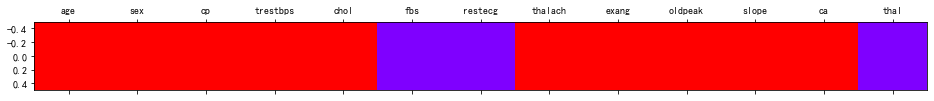

In [50]:
## 特征选择可视化（RFECV）
plt.figure(figsize=(16,4))
mat = rfecv.get_support().reshape(1,-1)
plt.matshow(mat,cmap="rainbow")
plt.xticks(range(13),X.columns)

## 嵌入式(Embedding)
> 思想：模型训练和特征选择结合，在优化过程中自动选择特征    <br>  
> 方法：  
>> ●𝑙1正则化项：优化过程中可得到稀疏解，等同于特征选择，如LASSO    <br>
●特征权重或重要性：设定阈值，若某特征的权重或重要性低于阈值，则将该特征剔除，如：决策树、SVM


>`SelectFromModel`类
>>|参数	                   |说明|
|:---|:---|
|estimator 	        |监督学习器，必须包含coef_或feature_importances_属性|
|threshold 	        |用于特征选择的阈值，设置方法如下：<br>若为浮点型：则表示阈值的绝对大小<br>若为字符串，'mean'(默认),'median'(权重或重要性的中位数)<br>若estimator包含“l1”正则化项，则默认值为1e-5|


In [51]:
## 嵌入式特征选择，estimator采用RandomForestClassifier

from ________________________ import SelectFromModel
from ____________ import RandomForestClassifier


## 使用随机森林作为监督学习器
base_estimator = RandomForestClassifier(n_estimators=200,random_state=10)
## 实例化SelectFromModel()
sfm = SelectFromModel(estimator=base_estimator,
                      threshold='median'
                     )

## 在X_train上训练规则，确定选择策略
sfm.fit(X_train,y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold='median')

In [53]:
## 查看特征选择情况
sfm.get_support()

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False])

In [54]:
## 构造Series查看特征选择情况
pd.Series(sfm.get_support(),index=X.columns)

age          True
sex         False
cp           True
trestbps     True
chol         True
fbs         False
restecg     False
thalach      True
exang       False
oldpeak      True
slope       False
ca           True
thal        False
dtype: bool

**特征选择可视化（嵌入式）**

([<matplotlib.axis.XTick at 0x20c282ec6a0>,
 [Text(0, 1, 'age'),
  Text(1, 1, 'sex'),
  Text(2, 1, 'cp'),
  Text(3, 1, 'trestbps'),
  Text(4, 1, 'chol'),
  Text(5, 1, 'fbs'),
  Text(6, 1, 'restecg'),
  Text(7, 1, 'thalach'),
  Text(8, 1, 'exang'),
  Text(9, 1, 'oldpeak'),
  Text(10, 1, 'slope'),
  Text(11, 1, 'ca'),
  Text(12, 1, 'thal')])

<Figure size 576x432 with 0 Axes>

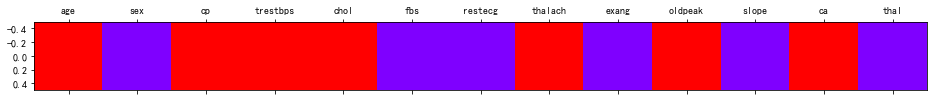

In [55]:
## 特征选择可视化（嵌入式）
# 将遮罩可视化——红色为True，紫色为False
plt.figure(figsize=(8, 6))
plt.matshow(sfm.get_support().reshape(1, -1), cmap='rainbow')
plt.xticks(range(13), X.columns)

**特征选择前后模型AUC对比**

In [57]:
##  对X_train进行转换,即特征选择
X_train_sfm = sfm.transform(X_train)

##  对X_test进行转换，即特征选择
X_test_sfm = sfm.transform(X_test)

In [58]:
## 特征选择前、后模型的AUC值
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=200,random_state=10)
## 特征选择前模型的AUC值
model.fit(X_train,y_train)
y_pred = model.____________
auc1 = roc_auc_score(____________,____________)
print("进行特征选择前的AUC值：",auc1)


## 特征选择后模型的AUC值
model.fit(____________,y_train)
y_pred_sfm = model.predict(____________)
auc2 = roc_auc_score(y_test,____________)
print("进行特征选择后的AUC值：",auc2)


进行特征选择前的AUC值： 0.803846153846154
进行特征选择后的AUC值： 0.803846153846154


# 小结
> 三种特征选择
>> ●Filter,过滤式  <br>
>>> 特点：不需要estimator，即不需要监督学习器，不需要引入基模型  <br>
>>> 常用方法：
>>>> 方差选择法：`VarianceThreshold`    <br>
>>>> 卡方检验法: `SelectKBest`,`chi2`

>> ●Wrapper,包裹式  <br>
>>> 特点：必须有estimator，即监督学习器且必须含有coef_或feature_importances属性，常用决策树  <br>
>>> 常用方法：
>>>> 递归特征消除法：`RFE`   <br>
>>>> 递归消除加CV：`RFECV`

>> ●Embedding，嵌入式  <br>
>>> 要点：必须有estimator，即监督学习器且必须含有coef_或feature_importances属性，常用随机森林  <br>
>>> 常用方法：
>>>> `SelectFromModel`

**扩展：将以上所有的特征选择结果，合并后进行matshow()**

★ 知识点：数据拼接
> 纵向拼接(矩阵变长)；如：数组t1 竖直拼接 数组t2 vstack；
>>`np.vstack((t1,t2))`

> 横向拼接(矩阵变宽)；如：数组t1 水平拼接 数组t2 hstack
>>`np.hstack((t1,t2))`

In [61]:
np.vstack?

In [59]:
## 特征选择可视化
## 将以上所有的结果构成整一个矩阵
mat_var = sel_var.get_support().reshape(1, -1)
mat_chi = sel_chi.get_support().reshape(1, -1)
mat_rfe = rfe.get_support().reshape(1, -1)
mat_rfecv = rfecv.get_support().reshape(1,-1)
mat_sfm = sfm.get_support().reshape(1, -1)

In [63]:
type(mat_sfm),mat_sfm.shape

(numpy.ndarray, (1, 13))

In [62]:
mat = np.vstack((mat_var,mat_chi,mat_rfe,mat_rfecv,mat_sfm))

In [64]:
mat.shape

(5, 13)

([<matplotlib.axis.YTick at 0x20c2812afd0>,
 [Text(0, 0, 'var'),
  Text(0, 1, 'chi'),
  Text(0, 2, 'rfe'),
  Text(0, 3, 'rfecv'),
  Text(0, 4, 'sfm')])

<Figure size 1152x720 with 0 Axes>

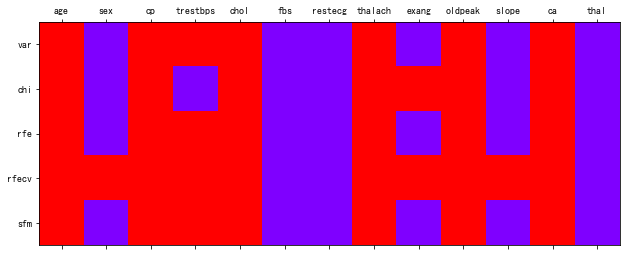

In [82]:
# 将遮罩可视化——红色为True，紫色为False
plt.figure(figsize=(16, 10))
plt.matshow(mat, cmap='rainbow')
#plt.grid(axis="y")     # 横向网格线
plt.xticks(range(13), X.columns)
plt.yticks([0,1,2,3,4],["var","chi","rfe","rfecv","sfm"])

分析：五种方法都选择了age,cp,chol,thalach,oldpeak,ca,这6个特征。

In [77]:
## 加一个分割矩阵
l3 = [2]*13

mat_sep = np.array(l3).reshape(1,-1)

In [78]:
mat_var = sel_var.get_support().reshape(1, -1)
mat_chi = sel_chi.get_support().reshape(1, -1)
mat_rfe = rfe.get_support().reshape(1, -1)
mat_rfecv = rfecv.get_support().reshape(1,-1)
mat_sfm = sfm.get_support().reshape(1, -1)

In [79]:
mat1 = np.vstack([mat_var,mat_sep,mat_chi,mat_sep,mat_rfe,mat_sep,mat_rfecv,mat_sep,mat_sfm])

In [80]:
mat1.shape

(9, 13)

([<matplotlib.axis.YTick at 0x20c2952aeb8>,
 [Text(0, 0, 'var'),
  Text(0, 2, 'chi'),
  Text(0, 4, 'rfe'),
  Text(0, 6, 'rfecv'),
  Text(0, 8, 'sfm')])

<Figure size 1440x720 with 0 Axes>

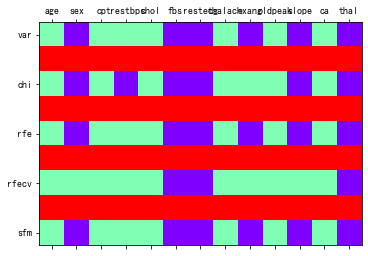

In [86]:
plt.figure(figsize=(20, 10))
plt.matshow(mat1, cmap='rainbow')
plt.xticks(range(13), X.columns)
plt.yticks([0,2,4,6,8],["var","chi","rfe","rfecv","sfm"])

解析：var、rfe和sfm的结论一致